In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
social = pd.read_csv("data/Social_Network_Ads.csv")
social.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
social = social.iloc[:,2:]
social.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [7]:
# Here we can see that Salary is scale of thousand so we need to standardized this
# but 1st thing 1st we have split our data into train & test sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = social.drop("Purchased", axis=1)
y = social["Purchased"]

# Split into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
X_test_scaled = pd.DataFrame(data=X_test_scaled, columns=X_test.columns)
X_train_scaled = pd.DataFrame(data=X_train_scaled, columns=X_train.columns)

In [12]:
X_train_scaled

,Age,EstimatedSalary
0,1.958981,-0.654400
1,-1.117229,0.078616
2,-0.059782,0.078616
3,1.093797,2.101738
4,-1.790150,-1.416736
...,...,...
315,-1.117229,-1.094209
316,1.670586,1.632609
317,-1.309492,-1.358094
318,-0.636571,0.195898


In [15]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,320.0,320.0
mean,-0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.7,-0.8
50%,-0.1,-0.0
75%,0.8,0.5
max,2.2,2.4


In [16]:
X_test_scaled

,Age,EstimatedSalary
0,-0.924966,0.518425
1,-0.828834,-0.771682
2,0.324744,0.518425
3,0.132481,0.049295
4,-0.732703,1.368723
...,...,...
75,1.958981,-1.358094
76,0.805402,0.283860
77,-1.405624,-0.097308
78,-1.021097,0.606387


In [17]:
np.round(X_test_scaled.describe())

,Age,EstimatedSalary
count,80.0,80.0
mean,0.0,0.0
std,1.0,1.0
min,-2.0,-2.0
25%,-1.0,-1.0
50%,-0.0,0.0
75%,1.0,1.0
max,2.0,2.0


## Let's Visualize the data by scatterplot

[Text(0.5, 1.0, 'After Standard Scaling'),
 Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'EstimatedSalarry')]

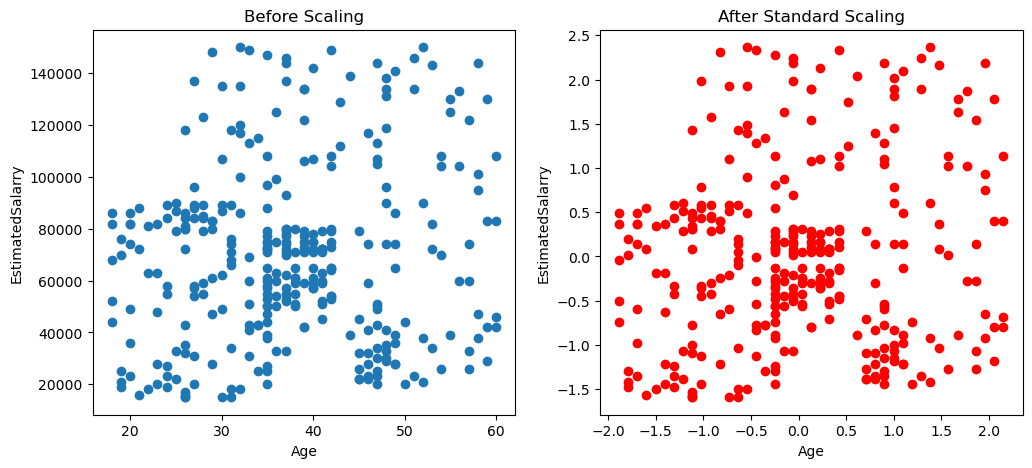

In [36]:
fig, (ax1, ax2) = plt.subplots(ncols=2,
                               nrows=1,
                               figsize=(12,5))

ax1.scatter(x=X_train.Age,
            y=X_train.EstimatedSalary)
ax1.set(title="Before Scaling",
        xlabel="Age",
        ylabel="EstimatedSalarry")

ax2.scatter(x=X_train_scaled.Age,
            y=X_train_scaled.EstimatedSalary,
            color="red")
ax2.set(title="After Standard Scaling",
        xlabel="Age",
        ylabel="EstimatedSalarry")

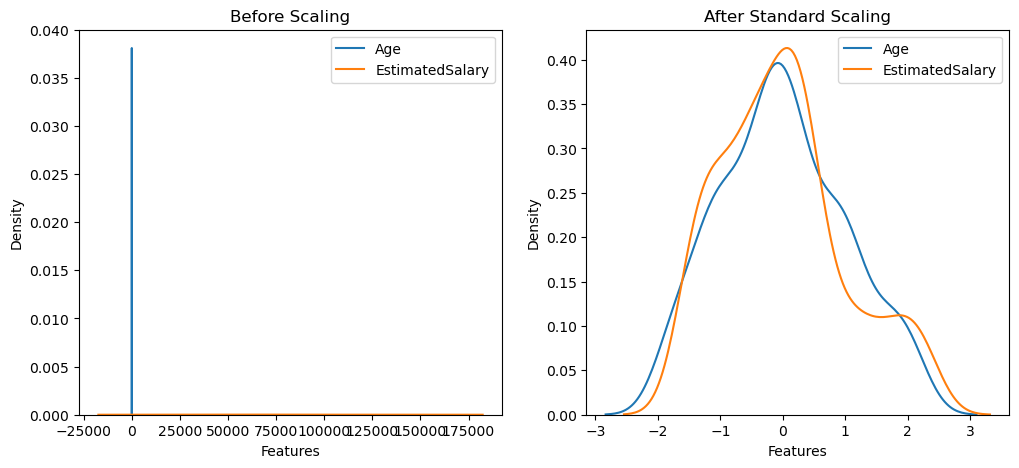

In [35]:
fig, (ax1,ax2) = plt.subplots(ncols=2,
                              nrows=1,
                              figsize=(12,5))

sns.kdeplot(X_train["Age"], ax=ax1, label="Age")
sns.kdeplot(X_train["EstimatedSalary"], ax=ax1, label="EstimatedSalary")
ax1.set(title="Before Scaling",
        xlabel="Features",
        ylabel="Density")
ax1.legend()

sns.kdeplot(X_train_scaled["Age"], ax=ax2, label="Age")
sns.kdeplot(X_train_scaled["EstimatedSalary"], ax=ax2, label="EstimatedSalary")
ax2.set(title="After Standard Scaling",
        xlabel="Features",
        ylabel="Density")
ax2.legend();

## Comparison of Distribution

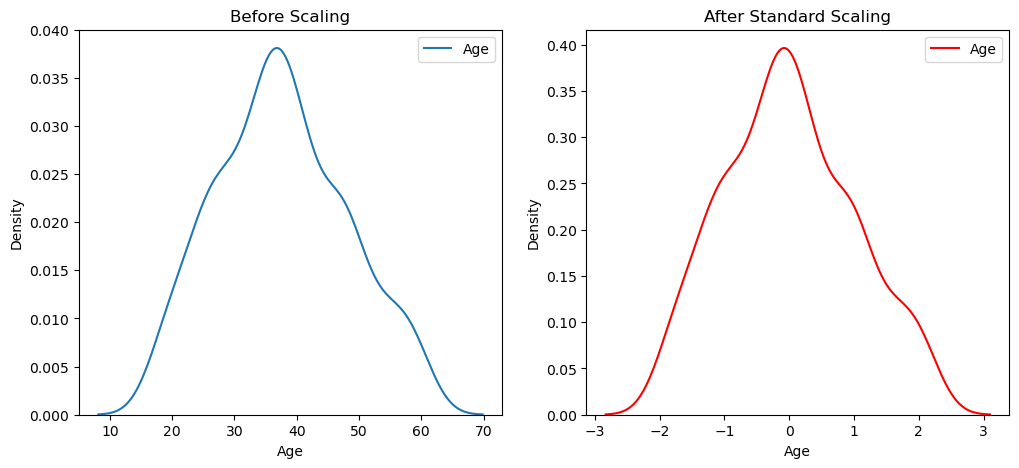

In [46]:
fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1, figsize=(12,5))

sns.kdeplot(X_train.Age, ax=ax1, label="Age")
sns.kdeplot(X_train_scaled.Age, ax=ax2, label="Age", color="red")
ax1.set_title("Before Scaling")
ax2.set_title("After Standard Scaling")
ax1.legend()
ax2.legend();

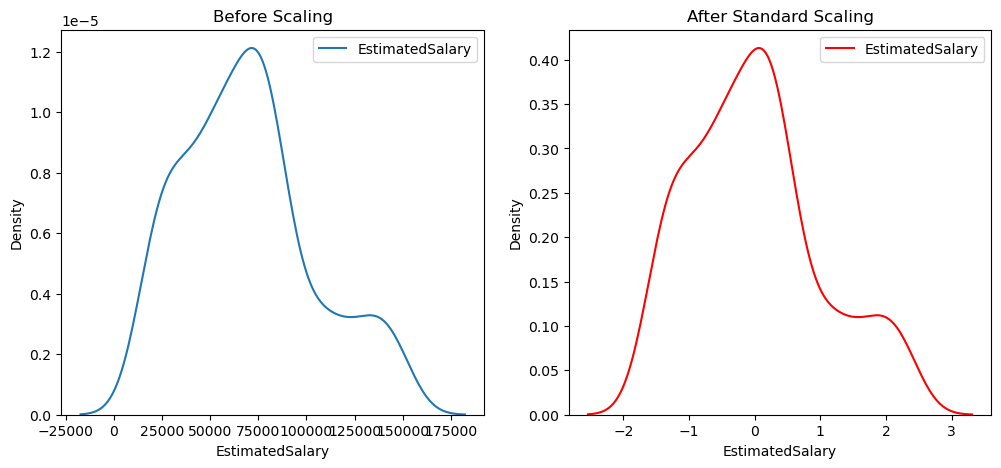

In [45]:
fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1, figsize=(12,5))

sns.kdeplot(X_train.EstimatedSalary, ax=ax1, label="EstimatedSalary")
sns.kdeplot(X_train_scaled.EstimatedSalary, ax=ax2, label="EstimatedSalary", color="red")
ax1.set_title("Before Scaling")
ax2.set_title("After Standard Scaling")
ax1.legend()
ax2.legend();